# Laptop Pricing Prediction

## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [3]:
df = pd.read_csv("laptop_price.csv", encoding = "latin-1")

In [5]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [9]:
# Remove product column 
df = df.drop("Product", axis=1)

In [11]:
# Binary encode companies
df = df.join(pd.get_dummies(df.Company).astype(int))
df = df.drop("Company", axis=1)

In [13]:
# Binary encode laptop types
df = df.join(pd.get_dummies(df.TypeName).astype(int))
df = df.drop("TypeName", axis=1)

In [15]:
# Split screen resolution column into width and height into two columns 
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [17]:
df = df.drop("ScreenResolution", axis=1)

In [19]:
# Split cpu brand and frequency into two columns
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [21]:
df = df.drop("Cpu", axis=1)

In [23]:
# Remove GHz
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [25]:
# Remove GB label in ram 
df["Ram"] = df["Ram"].str[:-2]

In [27]:
# Cast Cpu Frequency and Ram as a float and integer 
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [29]:
# Cast screen height and width as int
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [31]:
# Split memory column into amount and type into separate columns
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [33]:
# Function to convert TB to GB
def convert_memory_amount(memory):
    if 'TB' in memory:
        # Extract numeric value and convert to GB
        tb_value = float(memory.replace('TB', '').strip())
        gb_value = tb_value * 1000  # 1 TB = 1000 GB
        return f"{gb_value}GB"
    return memory  # Leave GB values unchanged

# Apply the function to the Memory Amount column
df['Memory Amount'] = df['Memory Amount'].apply(convert_memory_amount)

In [35]:
df = df.drop("Memory", axis=1)

In [37]:
# Remove GB from memory amount and convert to float
df["Memory Amount"] = df["Memory Amount"].str[:-2]

In [39]:
df["Memory Amount"] = df["Memory Amount"].astype(float)

In [41]:
# Binary encode memory type
df = df.join(pd.get_dummies(df["Memory Type"]).astype(int))
df = df.drop("Memory Type", axis=1)

In [43]:
# Remove kg from Weight and convert to float
df["Weight"] = df["Weight"].str[:-2]
df["Weight"] = df["Weight"].astype("float")

In [45]:
# Put weight into lbs
df["Weight"] = (df["Weight"] * 2.205).round(2)

In [47]:
# Split Gpu into brand
df["GPU Brand"] = df["Gpu"].str.split(" ").str[0]

In [49]:
df = df.drop("Gpu", axis=1)

In [51]:
# Binary encode operating system
df = df.join(pd.get_dummies(df.OpSys).astype(int))
df = df.drop("OpSys", axis=1)

In [53]:
# Ensure CPU and GPU names don't interfere with each other by renaming column names for binary variables
cpu_categories = pd.get_dummies(df["CPU Brand"]).astype(int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [55]:
gpu_categories = pd.get_dummies(df["GPU Brand"]).astype(int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [57]:
# Convert Euros to Dollars
df["Price_USD"] = (df["Price_euros"] * 1.12).round(2)
df = df.drop("Price_euros", axis=1)

## Descriptive Tables/Visualizations

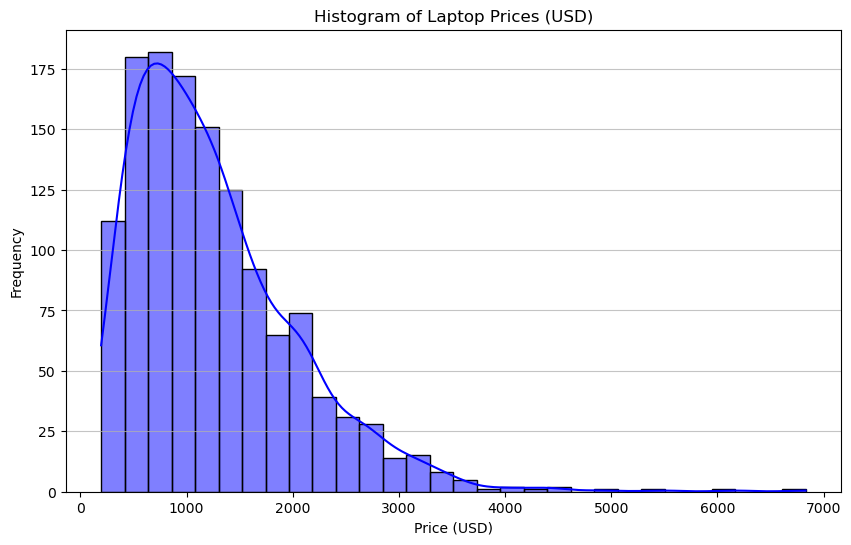

In [60]:
# Create a histogram of Price_USD
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_USD'], bins=30, color='blue', kde=True)
plt.title('Histogram of Laptop Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_29288\1885102160.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, y='Brand', x='Price_USD', palette='viridis')


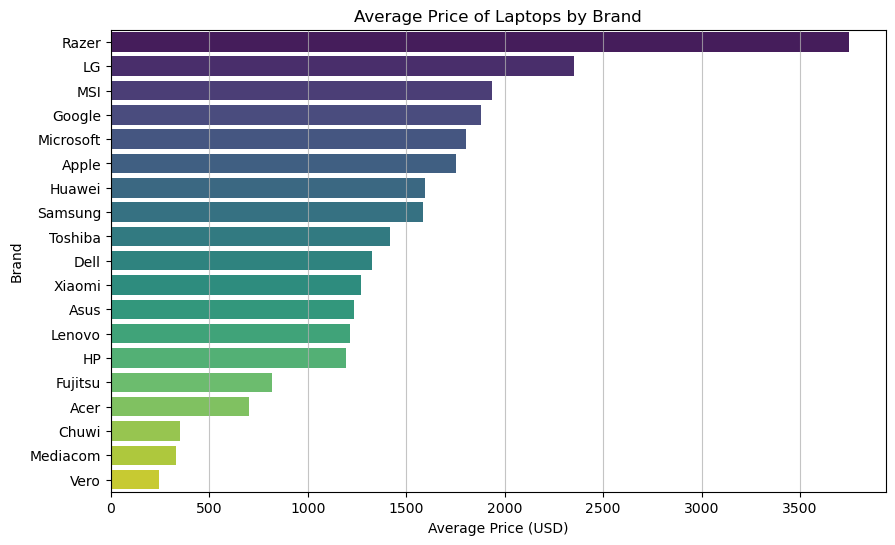

In [62]:
# Show avg price by brand
brands = [
    'Apple', 'Acer', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 
    'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Razer', 
    'Microsoft', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'
]

# Filter the DataFrame for brands that equal 1
brand_filter = df[brands].eq(1).any(axis=1)  # Get rows where any brand equals 1
avg_price = df[brand_filter].groupby(brands).agg({'Price_USD': 'mean'}).reset_index()

# Melt the DataFrame to long format for Seaborn
avg_price = avg_price.melt(id_vars=['Price_USD'], value_vars=brands, var_name='Brand', value_name='Included')
avg_price = avg_price[avg_price['Included'] == 1]  # Keep only rows where the brand is included

# Sort by average price
avg_price = avg_price.sort_values(by='Price_USD', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, y='Brand', x='Price_USD', palette='viridis')
plt.title('Average Price of Laptops by Brand')
plt.xlabel('Average Price (USD)')
plt.ylabel('Brand')
plt.grid(axis='x', alpha=0.75)
plt.show()

## Correlation Analysis

In [65]:
# Begin looking for important variables in pricing prediction analysis 
df.corr()

,laptop_ID,Inches,Ram,Weight,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Price_USD
laptop_ID,1.000000,-0.087796,-0.028607,-0.011743,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,0.009268,...,0.194094,-0.158931,-0.055338,0.049765,0.039920,-0.089050,0.039920,0.094479,-0.037596,0.067830
Inches,-0.087796,1.000000,0.237993,0.827484,0.009435,-0.158850,0.112766,-0.017426,0.045288,0.019637,...,-0.064775,-0.100867,0.129801,-0.122000,-0.052816,0.207023,-0.052816,-0.592264,0.486561,0.068197
Ram,-0.028607,0.237993,1.000000,0.383934,-0.138432,0.023950,0.088634,-0.035117,0.082241,-0.016214,...,-0.017529,0.028914,-0.104759,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464,0.743007
Weight,-0.011743,0.827484,0.383934,1.000000,0.056496,-0.138192,0.101468,-0.022460,0.088506,0.014017,...,-0.047922,-0.096072,0.062596,-0.057351,-0.036962,0.106488,-0.036962,-0.596270,0.565135,0.210480
Acer,-0.057721,0.009435,-0.138432,0.056496,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,-0.014074,...,-0.055411,-0.029411,0.068130,-0.066566,-0.008119,-0.034859,-0.008119,0.005305,0.020848,-0.208349
Apple,-0.119585,-0.158850,0.023950,-0.138192,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,-0.006148,...,-0.024206,0.784352,-0.028607,0.028849,-0.003547,0.001749,-0.003547,0.078028,-0.085183,0.080688
Asus,-0.044252,0.112766,0.088634,0.101468,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,-0.017845,...,-0.070257,-0.037291,0.038455,-0.036835,-0.010295,-0.073770,-0.010295,-0.106654,0.170742,-0.010376
Chuwi,-0.043348,-0.017426,-0.035117,-0.022460,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,-0.002308,...,-0.009086,-0.004822,-0.010737,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,-0.055646
Dell,-0.013628,0.045288,0.082241,0.088506,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,-0.026102,...,-0.032633,-0.054545,-0.121448,0.122473,-0.015058,0.190722,-0.015058,-0.075707,-0.060187,0.048509
Fujitsu,0.009268,0.019637,-0.016214,0.014017,-0.014074,-0.006148,-0.017845,-0.002308,-0.026102,1.000000,...,-0.009086,-0.004822,-0.010737,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,-0.027135


In [67]:
target_correlations = df.corr()['Price_USD'].apply(abs).sort_values()

In [69]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
Samsung_CPU           0.018431
ARM_GPU               0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097571
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [71]:
# Look at top 20 features for prices
top20_features = target_correlations[-21:].index

In [73]:
top20_features = list(top20_features)

In [75]:
top20_features

['MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Flash',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'CPU Frequency',
 'SSD',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_USD']

In [77]:
# Create a new df for only top features
filtered_df = df[top20_features]

In [79]:
filtered_df

,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Flash,Razer,Workstation,...,Nvidia_GPU,Gaming,HDD,CPU Frequency,SSD,Notebook,Screen Height,Screen Width,Ram,Price_USD
0,0,0,1,1,0,0,3.02,0,0,0,...,0,0,0,2.3,1,0,1600,2560,8,1500.45
1,0,0,1,1,0,0,2.95,1,0,0,...,0,0,0,1.8,0,0,900,1440,8,1006.81
2,0,0,1,1,0,0,4.10,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,644.00
3,0,0,1,0,1,0,4.04,0,0,0,...,0,0,0,2.7,1,0,1800,2880,16,2841.94
4,0,0,1,1,0,0,3.02,0,0,0,...,0,0,0,3.1,1,0,1600,2560,8,2020.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,1,1,0,0,3.97,0,0,0,...,0,0,0,2.5,1,0,1080,1920,4,714.56
1299,0,0,1,1,0,0,2.87,0,0,0,...,0,0,0,2.5,1,0,1800,3200,16,1678.88
1300,0,0,1,1,0,0,3.31,1,0,0,...,0,0,0,1.6,0,1,768,1366,2,256.48
1301,0,0,1,0,1,0,4.83,0,0,0,...,0,0,1,2.5,0,1,768,1366,6,855.68


<Axes: >

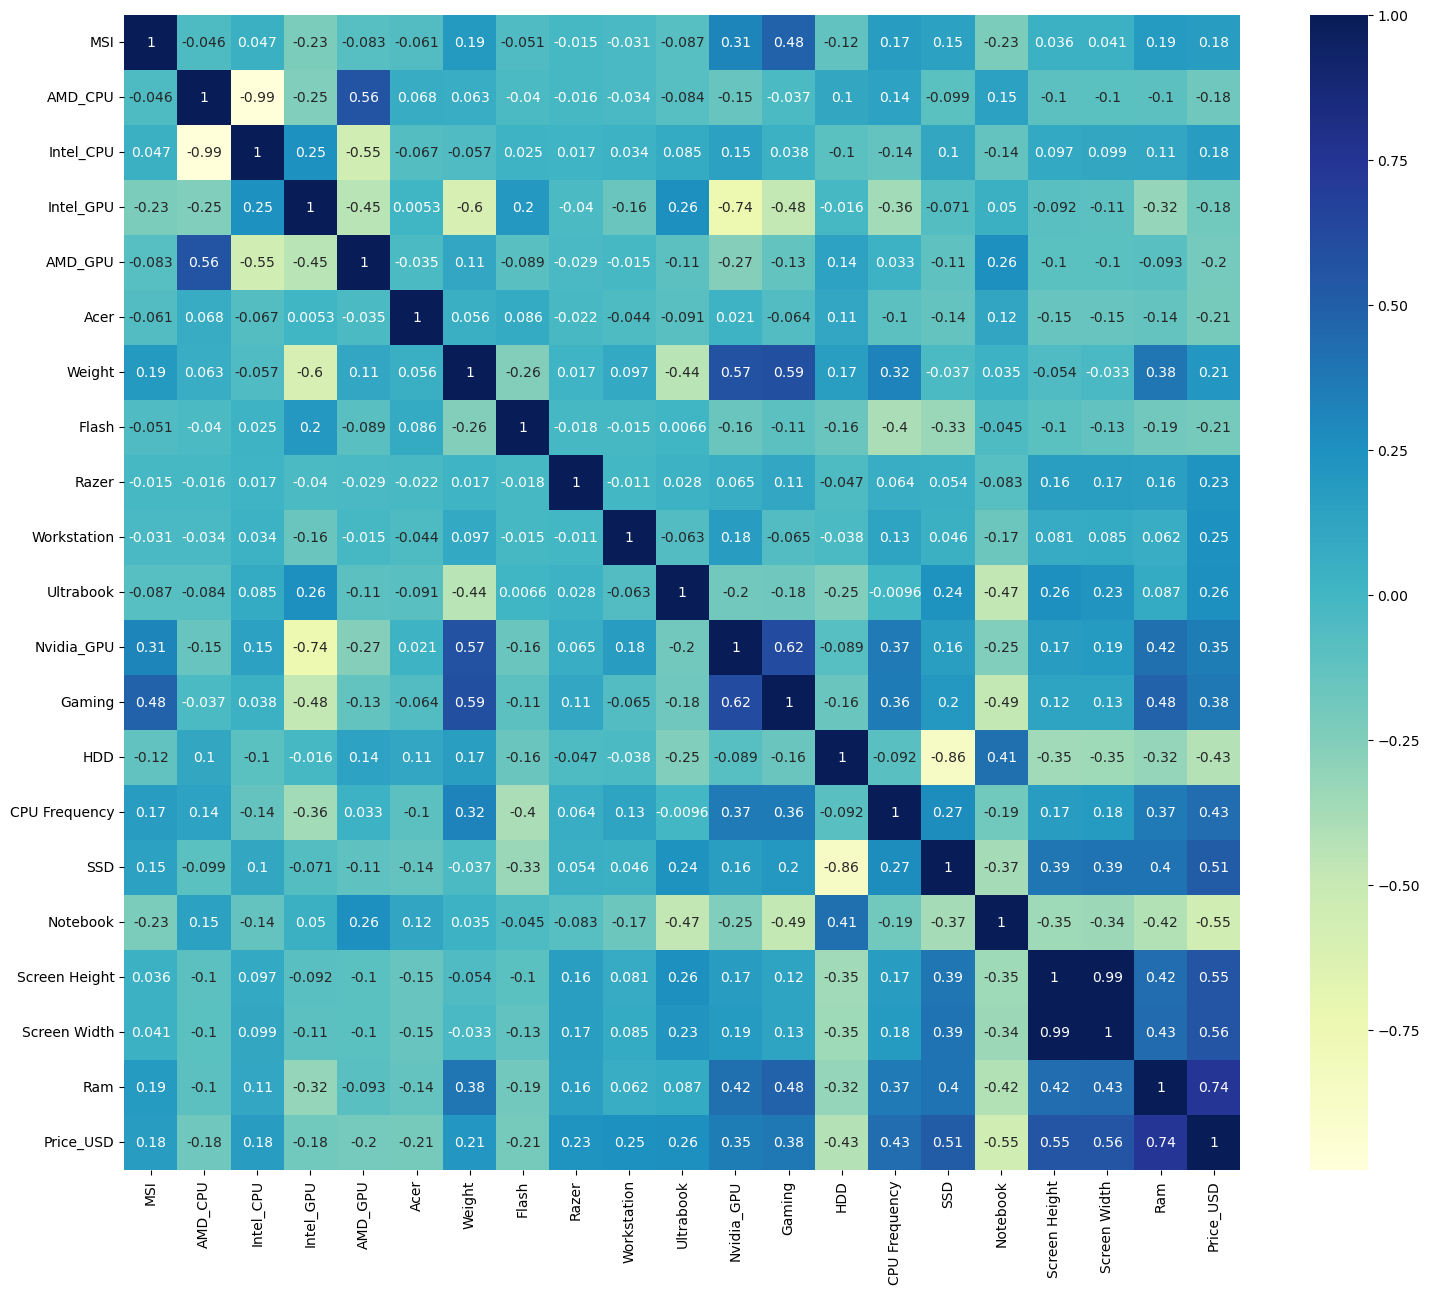

In [81]:
# Build a heatmap for correlations
plt.figure(figsize=(18,15))
sns.heatmap(filtered_df.corr(), annot=True, cmap="YlGnBu")

## Building Predictive Models

In [84]:
# Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
# Build a linear model and calcualte its R2, MSE, and RMSE
X = filtered_df.drop('Price_USD', axis=1) # Features
y = filtered_df['Price_USD'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Print evaluation metrics
print(f'Linear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - R² Score: {r2_linear}')
print(f'Root Mean Squared Error: {rmse_linear}')

# Print coefficients
coefficients_linear = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients_linear)

Linear Regression - Mean Squared Error: 165206.1136713588
Linear Regression - R² Score: 0.7407079710679185
Root Mean Squared Error: 406.4555494409675
               Coefficient
MSI              81.176237
AMD_CPU          36.660430
Intel_CPU       240.265305
Intel_GPU       193.728027
AMD_GPU          -5.030063
Acer           -185.762949
Weight           70.646198
Flash           -21.228075
Razer           853.176289
Workstation     690.034771
Ultrabook       125.853364
Nvidia_GPU       88.227771
Gaming         -206.791239
HDD             -38.138937
CPU Frequency   245.107139
SSD             203.220612
Notebook       -313.187030
Screen Height     0.691001
Screen Width     -0.123254
Ram              66.824481


In [88]:
# Build a random forest model 
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')

# Optional: Print feature importances
feature_importances_rf = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])
print(feature_importances_rf.sort_values(by='Importance', ascending=False))

Random Forest - Mean Squared Error: 131119.03922052952
Random Forest - Root Mean Squared Error: 362.103630498963
Random Forest - R² Score: 0.7942078476662914
               Importance
Ram              0.585326
Weight           0.151468
CPU Frequency    0.076810
Notebook         0.056161
Screen Width     0.025044
Workstation      0.023432
Screen Height    0.021246
Razer            0.015308
SSD              0.008355
Ultrabook        0.005586
HDD              0.005559
Gaming           0.004211
Intel_GPU        0.004178
Nvidia_GPU       0.003501
AMD_GPU          0.003455
MSI              0.003251
Acer             0.003231
AMD_CPU          0.001556
Intel_CPU        0.001369
Flash            0.000953


In [90]:
# Build a gradient boost model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)  # Calculate RMSE
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - Root Mean Squared Error: {rmse_gb}')
print(f'Gradient Boosting - R² Score: {r2_gb}')

# Optional: Print feature importances
feature_importances_gb = pd.DataFrame(gb_model.feature_importances_, X.columns, columns=['Importance'])
print(feature_importances_gb.sort_values(by='Importance', ascending=False))

Gradient Boosting - Mean Squared Error: 116594.13217451141
Gradient Boosting - Root Mean Squared Error: 341.4588293989649
Gradient Boosting - R² Score: 0.817004780142434
               Importance
Ram              0.513759
Weight           0.114837
Notebook         0.089312
CPU Frequency    0.084161
SSD              0.072915
Screen Width     0.042046
Workstation      0.029692
Razer            0.019086
Screen Height    0.012737
AMD_GPU          0.004821
Acer             0.003952
Ultrabook        0.003787
Intel_CPU        0.002426
Gaming           0.001706
AMD_CPU          0.001661
Flash            0.001501
Intel_GPU        0.000935
MSI              0.000523
Nvidia_GPU       0.000080
HDD              0.000065


In [92]:
# Compare performances of each model type
metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'RMSE': [rmse_linear, rmse_rf, rmse_gb],
    'R²': [r2_linear, r2_rf, r2_gb]
}

# Create a DataFrame
performance_df = pd.DataFrame(metrics)

# Display the DataFrame
print(performance_df)

               Model            MSE        RMSE        R²
0  Linear Regression  165206.113671  406.455549  0.740708
1      Random Forest  131119.039221  362.103630  0.794208
2  Gradient Boosting  116594.132175  341.458829  0.817005


## Tuning Gradient Boost Model

In [114]:
from sklearn.model_selection import GridSearchCV

In [120]:
# Rebuild gradient boost model now using entire dataset instead of filtered df
X = df.drop(columns=['Price_USD'])  # Features
y = df['Price_USD']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a gradient boost model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)  # Calculate RMSE
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - Root Mean Squared Error: {rmse_gb}')
print(f'Gradient Boosting - R² Score: {r2_gb}')

Gradient Boosting - Mean Squared Error: 104903.05304416007
Gradient Boosting - Root Mean Squared Error: 323.88740797406757
Gradient Boosting - R² Score: 0.8353540019765886


In [124]:
# Hyperparameter Tuning (may take while to run function) 

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with the best parameters to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_gb = best_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)  # Calculate RMSE
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - Root Mean Squared Error: {rmse_gb}')
print(f'Gradient Boosting - R² Score: {r2_gb}')

# Optional: Print best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

Gradient Boosting - Mean Squared Error: 101998.01979429301
Gradient Boosting - Root Mean Squared Error: 319.37128830609214
Gradient Boosting - R² Score: 0.8399134698360627
Best hyperparameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300, 'subsample': 0.8}


In [101]:
from joblib import load

In [94]:
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

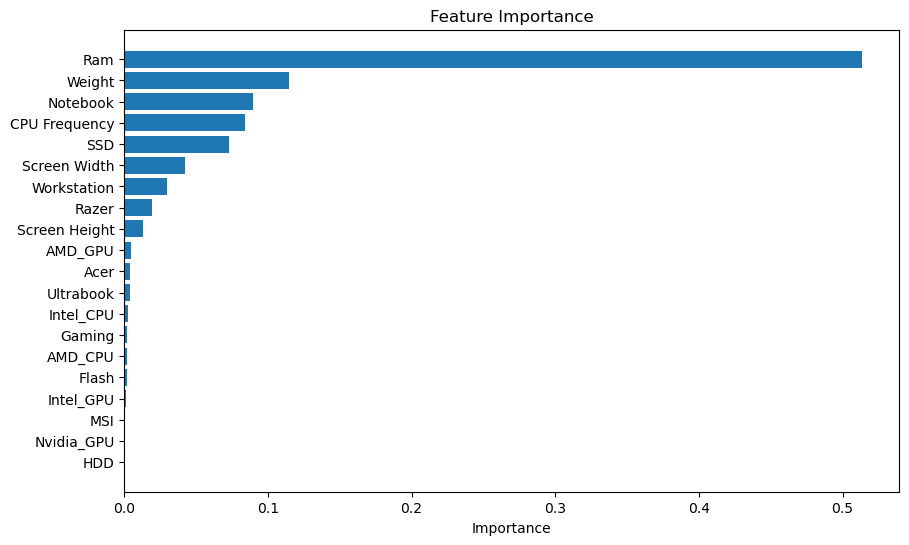

In [96]:
# Chart top features from Gradient Boosting Model (most effective) 
feature_importances = pd.DataFrame(gb_model.feature_importances_, X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=True, inplace=True)  # Sort in ascending order

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## Using Gradient Boost to make Predictions

In [107]:
# Define a function to prepare the input data and make predictions
def predict_laptop_price(specifications):
    # Create a DataFrame from the input specifications
    input_df = pd.DataFrame([specifications])
    
    # Ensure all binary features are present with correct values
    binary_features = [
        'Notebook', 'Workstation', 'Razer', 'SSD', 'Ultrabook', 
        'Gaming', 'Intel_GPU', 'Nvidia_GPU', 'AMD_GPU', 
        'MSI', 'Acer', 'AMD_CPU', 'Intel_CPU', 'Flash'
    ]
    
    # Ensure all binary features are set to 0 or 1
    for feature in binary_features:
        input_df[feature] = input_df.get(feature, 0)  # Default to 0 if not provided

    # Reindex to ensure the input DataFrame has the same columns as the training data
    input_df = input_df.reindex(columns=X.columns, fill_value=0)  # Fill missing columns with 0

    # Make a prediction
    predicted_price = gb_model.predict(input_df)

    return predicted_price[0]

# Input desired laptop specifications here (1 = yes, 0 = no)
new_laptop_specifications = {
    'Ram': 16,  # Float or Integer
    'Weight': 3.3,    # Float
    'CPU Frequency': 1.1,  # Float
    'Notebook': 1,    
    'Screen Width': 11.97, # Float
    'Workstation': 0,
    'Screen Height': 8.46, # Float
    'Razer': 0,
    'SSD': 1,
    'Ultrabook': 0,
    'HDD': 0,
    'Gaming': 1,
    'Intel_GPU': 0,
    'Nvidia_GPU': 1,
    'AMD_GPU': 0,
    'MSI': 0,
    'Acer': 0,
    'AMD_CPU': 0,
    'Intel_CPU': 1,
    'Flash': 0
}

# Predict the price
predicted_price = predict_laptop_price(new_laptop_specifications)
print(f'The predicted price for the laptop is: ${predicted_price:.2f}')

The predicted price for the laptop is: $1607.97
